In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel, mutual_info_classif

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importing Data

In [2]:
from src.getdata_utils import load_data, split_data

In [3]:
filepath="../data/bank-full.csv"
df_bank = pd.read_csv(filepath, sep=';', header=0)
df_bank[df_bank['y'] == 'yes'].head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes


In [4]:
X, y = load_data()
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# Data Cleaning

In [5]:
from src.cleaning import CyclicalMonthEncoder

CyclicalMonthEncoder()

,column_name,'month'


In [6]:
from src.cleaning import build_preprocessor, fit_and_return_preprocessed_df

# 5. Build the preprocessor based on training data
preprocessor = build_preprocessor(X_train)

# 6. Fit and transform X_train
X_train_df = fit_and_return_preprocessed_df(preprocessor, X_train)

In [7]:
X_train_df

,categorical_features__contact_cellular,categorical_features__contact_telephone,categorical_features__contact_unknown,categorical_features__default_yes,categorical_features__education_primary,categorical_features__education_secondary,categorical_features__education_tertiary,categorical_features__education_unknown,categorical_features__housing_yes,categorical_features__job_admin.,...,categorical_features__poutcome_success,categorical_features__poutcome_unknown,num_transformer__age,num_transformer__balance,num_transformer__day,num_transformer__campaign,num_transformer__pdays,num_transformer__previous,month_transformer__month_sin,month_transformer__month_cos
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.266667,1.496211,-0.307692,-0.5,0.0,0.0,1.224647e-16,-1.000000
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.066667,0.164110,-0.538462,-0.5,0.0,0.0,1.224647e-16,-1.000000
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,2.491961,0.692308,2.0,0.0,0.0,-8.660254e-01,-0.500000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.200000,-0.096101,0.846154,0.0,0.0,0.0,-8.660254e-01,-0.500000
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.533333,0.130845,0.538462,1.0,0.0,0.0,5.000000e-01,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.400000,0.799852,-0.538462,-0.5,93.0,3.0,8.660254e-01,0.500000
27122,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.533333,-0.228424,0.076923,-0.5,0.0,0.0,1.224647e-16,-1.000000
27123,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.133333,0.382924,1.076923,0.0,0.0,0.0,5.000000e-01,0.866025
27124,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.133333,-0.024395,1.076923,0.0,0.0,0.0,5.000000e-01,-0.866025


# Baseline Model
### Always predic the majority class

In [8]:
# Let's say y_val contains the true values
y_baseline = np.zeros_like(y_val)  # predict "0" for all (no investment)

# Evaluate it
baseline_results = {
    "Accuracy": accuracy_score(y_val, y_baseline),
    "Precision": precision_score(y_val, y_baseline, zero_division=0),
    "Recall": recall_score(y_val, y_baseline),
    "F1 Score": f1_score(y_val, y_baseline),
    "ROC AUC": roc_auc_score(y_val, y_baseline) if len(np.unique(y_val)) == 2 else "N/A"
}

for metric, value in baseline_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.8829904888299049
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5


# Logistic Regression

In [9]:
from src.model_log_reg import build_logreg_pipeline, evaluate_model
logreg_pipeline = build_logreg_pipeline(preprocessor, max_iter=1000, random_state=42)

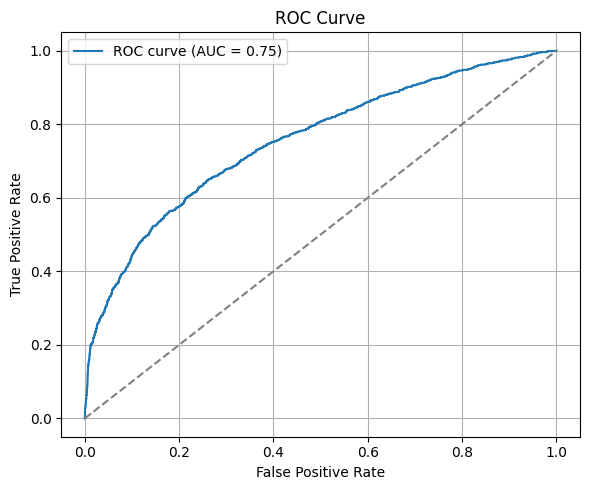

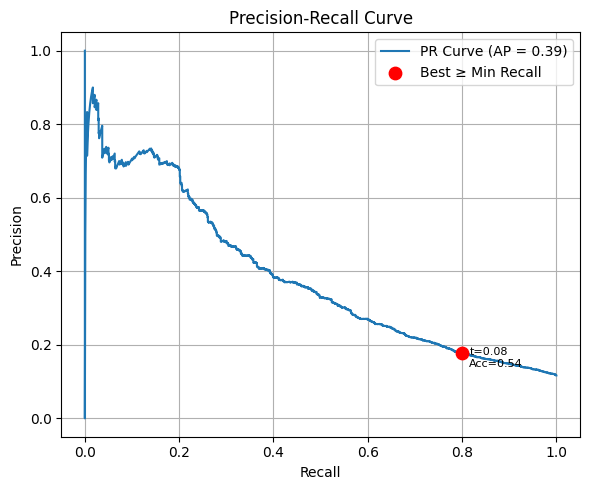

Threshold: 0.08
Accuracy: 0.5155938951559389
Balanced Accuracy: 0.6473981753677488
Precision: 0.17147943037974683
Recall: 0.8194706994328923
F1 Score: 0.28361138370951916
F0.5-Score: 0.2036932619114745
ROC AUC: 0.7545174233154399
Average Precision: 0.3850343970503327
Best Threshold for Min Recall: {'Best Threshold': np.float64(0.0846882275319543), 'Precision': np.float64(0.17809083263246425), 'Recall': np.float64(0.8005671077504726), 'Accuracy': 0.5443485954434859}


In [10]:
logreg_pipeline.fit(X_train, y_train)

# Predict class labels
y_pred = logreg_pipeline.predict(X_val)

# Predict probabilities for ROC-AUC
y_proba = logreg_pipeline.predict_proba(X_val)[:, 1]

# Evaluate
metrics = evaluate_model(y_val, y_pred, y_proba=y_proba,threshold=0.08, beta=0.5, plot_pr = True, plot_roc=True, min_recall=0.80)
for metric, value in metrics.items():
    print(f"{metric}: {value}")

In [11]:
import pickle

my_object = logreg_pipeline
file_path = '../models/log_pipeline_20250809.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(my_object, file)

In [12]:
with open(file_path, 'rb') as file:
    loaded_log_model = pickle.load(file)

In [13]:
loaded_log_model

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical_features', ...), ('num_transformer', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Random Forest

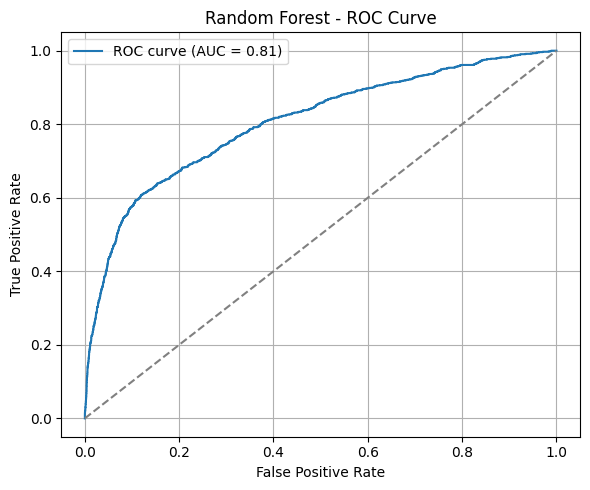

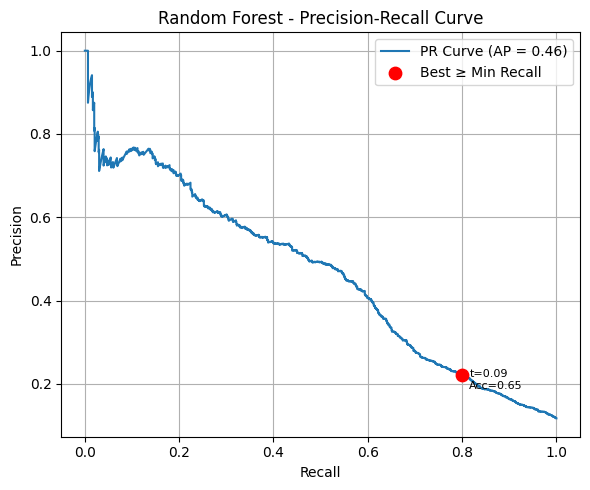

Threshold: 0.089
Accuracy: 0.6469807564698076
Balanced Accuracy: 0.7135976821317493
Precision: 0.22126436781609196
Recall: 0.8005671077504726
F1 Score: 0.3467048710601719
F0.5-Score: 0.25870494807574834
ROC AUC: 0.8050922260399817
Average Precision: 0.46230670228216203
Best Threshold for Min Recall: {'Best Threshold': np.float64(0.08906717912898228), 'Precision': np.float64(0.22155375359665183), 'Recall': np.float64(0.8005671077504726), 'Accuracy': 0.6475337314753373}


In [14]:
# Change this import line
from src.model_random_forest import build_rf_pipeline, evaluate_rf_model, get_feature_importance

# Build RF pipeline (same pattern as logistic regression)
rf_pipeline = build_rf_pipeline(preprocessor, n_estimators=100, max_depth=10, random_state=42)

# Train (exactly the same)
rf_pipeline.fit(X_train, y_train)

# Predict (exactly the same)
y_pred = rf_pipeline.predict(X_val)
y_proba = rf_pipeline.predict_proba(X_val)[:, 1]

# Evaluate (same function call, just different name)
metrics = evaluate_rf_model(y_val, y_pred, y_proba=y_proba, threshold=0.089, beta=0.5, plot_pr=True, plot_roc=True, min_recall=0.80)
for metric, value in metrics.items():
    print(f"{metric}: {value}")


# XG Boost

In [ ]:
from src.model_xgboost import build_xgboost_pipeline, evaluate_xgboost_model,compare_models
logreg_pipeline.fit(X_train, y_train)

# Predict class labels
y_pred = logreg_pipeline.predict(X_val)

# Predict probabilities for ROC-AUC
y_proba = logreg_pipeline.predict_proba(X_val)[:, 1]

# Evaluate
metrics = evaluate_model(y_val, y_pred, y_proba=y_proba,threshold=0.08, beta=0.5, plot_pr = True, plot_roc=True, min_recall=0.80)
for metric, value in metrics.items():
    print(f"{metric}: {value}")

TypeError: BaseGradientBoosting.fit() got an unexpected keyword argument 'eval_set'